# Complexity Analysis of Board Games' Rulebooks

This project is aimed to predict the difficulty of the board games by their rulebooks' text analysis. Rulebooks dataset is gathered manually and games are selected randomly while the homogeneity of the difficulties are wanted to be kept. Rulebook text files are combined a priori with the metadata of the games that were fetched from BoardGameGeek's database with BGGXMLAPI2.

Contents:
 1. [Normalizing](#Normalizing)
 2. [Analyzing the rulebooks](#Analyzing-the-rulebooks)
 3. [Linear Regression](#Linear-Regression)
 4. [Data below weight 4](#Data-below-weight-4)
 5. [Predicting](#Predicting)

In [1]:
import os
import re
import random
from tqdm.notebook import tqdm
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from lexicalrichness import LexicalRichness
import hyphenate
import nltk
from string import punctuation
from bs4 import BeautifulSoup

In [2]:
folder = "/Users/berket/Desktop/UNIMI/Info. Retrieval/Final Project/Data/XMLs"
files = [f for f in os.listdir(folder) if f.endswith('.xml')]

In [3]:
games = []
for file in files:
    with open(os.path.join(folder, file), 'r') as data:
        games.append(data.read())

In [4]:
len(games)

85

In [5]:
rb_texts_raw = []
rb_texts = []
game_names = []
weight_list = []

for i in range(len(games)):
    soup = BeautifulSoup(games[i], 'xml')
    rb_texts_raw.append(soup.find('rulebook').text)
    rb_texts.append(soup.find('rulebook').text)
    game_names.append(soup.find('name')['value'])
    weight_list.append(float(soup.find('averageweight')['value']))
    
    print(soup.find('name')['value'])
    print(soup.find('averageweight')['value'])

Sword & Sorcery
4.0679
Infidel
2.9038
Space Empires 4X
3.3826
Pax Baltica
2.96
All Bridges Burning: Red Revolt and White Guard in Finland, 1917-1918
3.4783
Pax Romana
3.6689
Trickerion: Legends of Illusion
4.2232
Virgin Queen
4.4183
Kingdomino
1.2166
1817
4.7407
Medieval
2.4074
Von Manstein's Backhand Blow
3.1316
Food Chain Magnate
4.2064
Commands & Colors: Ancients
2.691
Iron and Oak
2.5938
Risorgimento 1859: the Second Italian War of Independence
3.3
Die Macher
4.3211
Dominant Species
4.0426
Kutuzov
3.3878
Carcassonne
1.9039
Cerebria: The Inside World
4.3365
Labyrinth: The War on Terror, 2001 – ?
3.6319
Secret Hitler
1.6734
Monopoly
1.6349
Hellenes: Campaigns of the Peloponnesian War
3
Vinhos
4.2113
Pacific Typhoon
2.0169
The Colonists
4.0776
Stalin's War
3.1429
The Gallerist
4.2647
Pendragon: The Fall of Roman Britain
4.4752
Unhappy King Charles!
3.3145
Century: Spice Road
1.7856
Dungeon Mayhem
1.1176
Sagrada
1.9234
Gloomhaven
3.8776
Santorini
1.7346
Corsairs and Hellcats
2.1622
Bat

## Normalizing

Rulebooks texts are usually dirty and they need to be cleaned from unnecessary characters that may affect the final result

In [6]:
for i in range(len(rb_texts)):
    rb_texts[i] = rb_texts[i].replace('\n', '  ')
    rb_texts[i] = rb_texts[i].replace('\t', '')
    rb_texts[i] = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", rb_texts[i])

## Analyzing the rulebooks

### Vocabulary Richness

Vocabulary Richness will be calculated by Guiraud index. This index is used to understand or measure the lexical richness.

<br>

$$
G = \frac{V}{\sqrt N}
$$

<br>

- `V`: number of unique words
- `N`: total number of words

In [7]:
guiraud_list = []

for i in tqdm(range(len(rb_texts))):
    v = LexicalRichness(rb_texts[i]).terms
    n = LexicalRichness(rb_texts[i]).words
    guiraud = LexicalRichness(rb_texts[i]).rttr
    guiraud_list.append(LexicalRichness(rb_texts[i]).rttr)
    
    print('Number of unique terms: {}'.format(v))
    print('Total number of words: {}'.format(n))
    print('Vocabulary Richness of the rulebook by Guiraud Index: {:.4f}'.format(guiraud))
    print()

  0%|          | 0/85 [00:00<?, ?it/s]

Number of unique terms: 2164
Total number of words: 26492
Vocabulary Richness of the rulebook by Guiraud Index: 13.2954

Number of unique terms: 1409
Total number of words: 12425
Vocabulary Richness of the rulebook by Guiraud Index: 12.6405

Number of unique terms: 1392
Total number of words: 12586
Vocabulary Richness of the rulebook by Guiraud Index: 12.4078

Number of unique terms: 1256
Total number of words: 10014
Vocabulary Richness of the rulebook by Guiraud Index: 12.5512

Number of unique terms: 1924
Total number of words: 20185
Vocabulary Richness of the rulebook by Guiraud Index: 13.5422

Number of unique terms: 2625
Total number of words: 35562
Vocabulary Richness of the rulebook by Guiraud Index: 13.9199

Number of unique terms: 1216
Total number of words: 10321
Vocabulary Richness of the rulebook by Guiraud Index: 11.9694

Number of unique terms: 2408
Total number of words: 39537
Vocabulary Richness of the rulebook by Guiraud Index: 12.1103

Number of unique terms: 276
Tota

Number of unique terms: 1285
Total number of words: 8766
Vocabulary Richness of the rulebook by Guiraud Index: 13.7247

Number of unique terms: 901
Total number of words: 4606
Vocabulary Richness of the rulebook by Guiraud Index: 13.2759

Number of unique terms: 467
Total number of words: 3115
Vocabulary Richness of the rulebook by Guiraud Index: 8.3673

Number of unique terms: 1798
Total number of words: 19053
Vocabulary Richness of the rulebook by Guiraud Index: 13.0259

Number of unique terms: 1754
Total number of words: 10807
Vocabulary Richness of the rulebook by Guiraud Index: 16.8724

Number of unique terms: 1479
Total number of words: 13662
Vocabulary Richness of the rulebook by Guiraud Index: 12.6535

Number of unique terms: 916
Total number of words: 3874
Vocabulary Richness of the rulebook by Guiraud Index: 14.7169

Number of unique terms: 2583
Total number of words: 28000
Vocabulary Richness of the rulebook by Guiraud Index: 15.4364

Number of unique terms: 1715
Total numbe

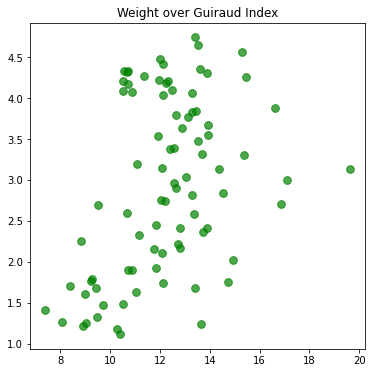

In [8]:
x = guiraud_list
y = weight_list

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, s=60, alpha=0.7, c="g")
plt.title('Weight over Guiraud Index')
plt.show()

### Complexity of text

Complexity of text is calculated by *Gunning Fog Index*. In short description, it measures the readability of the given text.

<br>

$$
F = 0.4 \biggl(\frac{W}{S} +100 \frac{CW}{W} \biggl)
$$

<br>

- `W`: number of tokenized words
- `S`: number of sentences
- `CW`: number of tokenized complex words, which have more than 3 syllables

In [9]:
nltk_tokenize = lambda text: [x.lower() for x in nltk.word_tokenize(text) if x not in punctuation]

In [10]:
def fog(w, s, cw):
    if s != 0 and w != 0:
        return 0.4 * ((w / s) + 100 * (cw / w))
    else:
        return 0

In [11]:
fog_list = []
sentences_list = []
num_of_words_list = []
complex_words_list = []

for i in tqdm(range(len(games))):
    soup = BeautifulSoup(games[i], 'xml')
    name = soup.find('name')['value']
    weight = float(soup.find('averageweight')['value'])
    lex = LexicalRichness(rb_texts[i])

    words = lex.words
    temp_sentences = re.split('\! |\... |\? |\. |  ', rb_texts[i]) # separating the sentences to count
    sentences = 0
    for s in temp_sentences:
        if len(s) > 3:
            sentences += 1
            
    num_of_words_list.append(words)
    sentences_list.append(sentences)

    complex_words = 0
    words_list = nltk_tokenize(rb_texts[i])

    # a word is complex if it has at least three syllables
    for word in words_list:
        if len(hyphenate.hyphenate_word(word)) >= 3:
            complex_words += 1
    
    complex_words_list.append(complex_words)
    
    fog_result = fog(words, sentences, complex_words)
    fog_list.append(fog_result)
    
    output = 'Number of words: {}\nNumber of sentences: {}\nNumber of complex words: {}\nGunning Fog Index is: {:.4f}'.format(words, sentences, complex_words, fog_result)
    
    if weight > 3:
        print('Name of the game: {}'.format(name))        # name of the game 
        print(output)                                     # text statistics         
        print('Weight of the game: {}'.format(weight))    # weight
        print()

  0%|          | 0/85 [00:00<?, ?it/s]

Name of the game: Sword & Sorcery
Number of words: 26492
Number of sentences: 4361
Number of complex words: 2983
Gunning Fog Index is: 6.9339
Weight of the game: 4.0679

Name of the game: Space Empires 4X
Number of words: 12586
Number of sentences: 1439
Number of complex words: 1306
Gunning Fog Index is: 7.6492
Weight of the game: 3.3826

Name of the game: All Bridges Burning: Red Revolt and White Guard in Finland, 1917-1918
Number of words: 20185
Number of sentences: 2680
Number of complex words: 2805
Gunning Fog Index is: 8.5713
Weight of the game: 3.4783

Name of the game: Pax Romana
Number of words: 35562
Number of sentences: 3731
Number of complex words: 3819
Gunning Fog Index is: 8.1082
Weight of the game: 3.6689

Name of the game: Trickerion: Legends of Illusion
Number of words: 10321
Number of sentences: 1437
Number of complex words: 1151
Gunning Fog Index is: 7.3337
Weight of the game: 4.2232

Name of the game: Virgin Queen
Number of words: 39537
Number of sentences: 4373
Numb

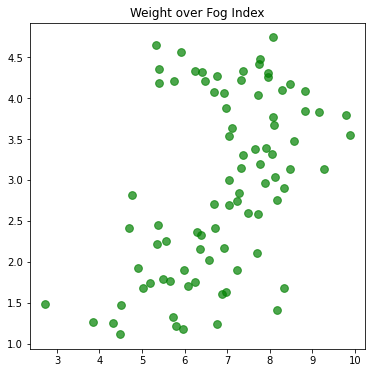

In [12]:
x = fog_list
y = weight_list

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, s=60, alpha=0.7, c="g")
plt.title('Weight over Fog Index')
plt.show()

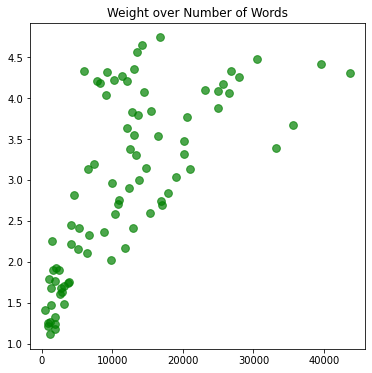

In [13]:
x = num_of_words_list
y = weight_list

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, s=60, alpha=0.7, c="g")
plt.title('Weight over Number of Words')
plt.show()

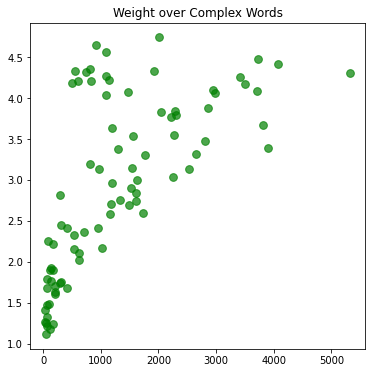

In [14]:
x = complex_words_list
y = weight_list

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, s=60, alpha=0.7, c="g")
plt.title('Weight over Complex Words')
plt.show()

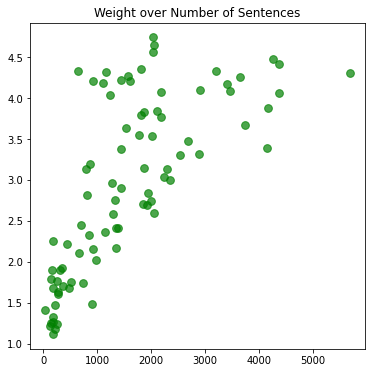

In [15]:
x = sentences_list
y = weight_list

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, s=60, alpha=0.7, c="g")
plt.title('Weight over Number of Sentences')
plt.show()

## Linear Regression

[Linear Regression with Least Squares Method of SciPy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) is used. Each metrics' regression values calculated afterwards to measure graphs and correlations.

In [16]:
slope1, intercept1, r1, p1, std_err1 = linregress(fog_list, weight_list)
slope2, intercept2, r2, p2, std_err2 = linregress(guiraud_list, weight_list)
slope3, intercept3, r3, p3, std_err3 = linregress(num_of_words_list, weight_list)
slope4, intercept4, r4, p4, std_err4 = linregress(sentences_list, weight_list)
slope5, intercept5, r5, p5, std_err5 = linregress(complex_words_list, weight_list)

In [17]:
def fog2weight(var):
    return slope1 * var + intercept1
def guiraud2weight(var):
    return slope2 * var + intercept2
def words2weight(var):
    return slope3 * var + intercept3
def sentences2weight(var):
    return slope4 * var + intercept4
def complex2weight(var):
    return slope5 * var + intercept5

In [18]:
pred_by_fog = list(map(fog2weight, fog_list))
pred_by_guiraud = list(map(guiraud2weight, guiraud_list))
pred_by_words = list(map(words2weight, num_of_words_list))
pred_by_sentences = list(map(sentences2weight, sentences_list))
pred_by_complex = list(map(complex2weight, complex_words_list))

### Analyzing with Graphs

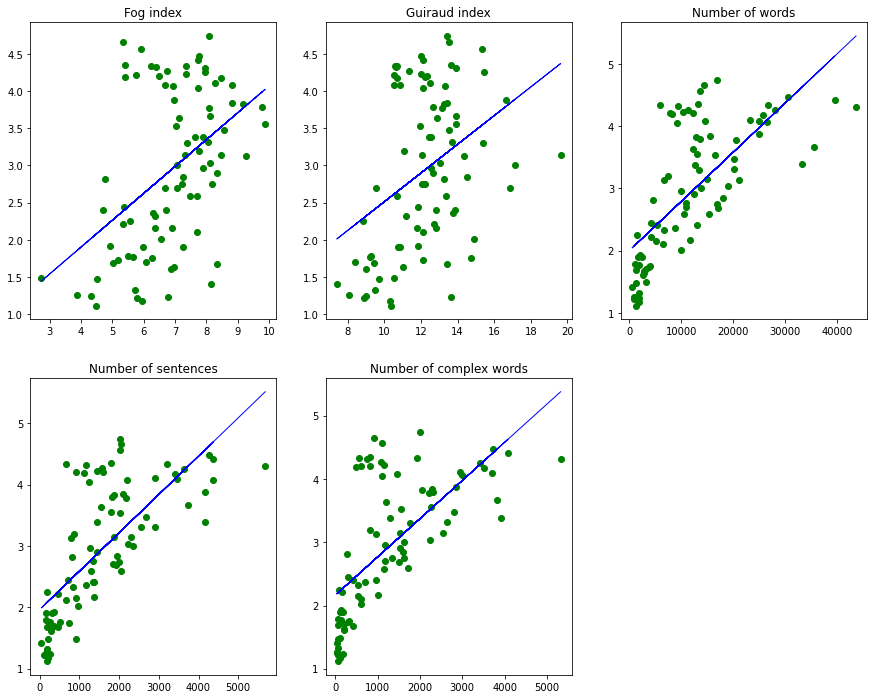

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(15,12))
axs[0, 0].scatter(fog_list, weight_list, c='g')
axs[0, 0].plot(fog_list, pred_by_fog, color='b', linewidth=1)
axs[0, 0].set_title('Fog index')

axs[0, 1].scatter(guiraud_list, weight_list, c='g')
axs[0, 1].plot(guiraud_list, pred_by_guiraud, color='b', linewidth=1)
axs[0, 1].set_title('Guiraud index')

axs[0, 2].scatter(num_of_words_list, weight_list, c='g')
axs[0, 2].plot(num_of_words_list, pred_by_words, color='b', linewidth=1)
axs[0, 2].set_title('Number of words')

axs[1, 0].scatter(sentences_list, weight_list, c='g')
axs[1, 0].plot(sentences_list, pred_by_sentences, color='b', linewidth=1)
axs[1, 0].set_title('Number of sentences')

axs[1, 1].scatter(complex_words_list, weight_list, c='g')
axs[1, 1].plot(complex_words_list, pred_by_complex, color='b', linewidth=1)
axs[1, 1].set_title('Number of complex words')

fig.delaxes(axs[1,2])
plt.savefig('plots.jpg')
plt.show()

In [20]:
print("By Fog index, coefficient of determination is {:.4f}".format(r1))
print("By Guiraud index, coefficient of determination is {:.4f}".format(r2))
print("By the number of words, coefficient of determination is {:.4f}".format(r3))
print("By the number of sentences, coefficient of determination is {:.4f}".format(r4))
print("By the number of complex words, coefficient of determination is {:.4f}".format(r5))

By Fog index, coefficient of determination is 0.4644
By Guiraud index, coefficient of determination is 0.3871
By the number of words, coefficient of determination is 0.7052
By the number of sentences, coefficient of determination is 0.7174
By the number of complex words, coefficient of determination is 0.6698


Unfortunately, Guiraud Index gives the worst correlation with the data. Thus, it is not possible to use this index to calculate the complexity. The surprising fact is that coefficient of determination of Fog Index is almost 0.5 while the inner parts of the index has high results such as words, sentences, and complex words. It is wiser to use higher three aspects instead of Fog Index as well.

Worth to mention, data points are sort of broken when it gets harder and harder (especially after the weight 4). Most of the games that have the weight bigger than four are not getting along with the rest of the data as they should. Next section is to visualize it to understand better whether the statement is true.

## Data below weight 4

Data below weight 4 are believed to give better performance due to the peculiarity of the most difficult games. All metrics but Guiraud Index are calculated in this step. The reason why Guiraud Index is excluded because it most likely is not reversible from its result.

In [21]:
sub_weight_list = []
sub_fog_list = []
sub_words_list = []
sub_sentences_list = []
sub_complex_list = []

for i in range(len(weight_list)):
    if weight_list[i] < 4:
        sub_weight_list.append(weight_list[i])
        sub_fog_list.append(fog_list[i])
        sub_words_list.append(num_of_words_list[i])
        sub_sentences_list.append(sentences_list[i])
        sub_complex_list.append(complex_words_list[i])

In [22]:
slope6, intercept6, r6, p6, std_err6 = linregress(sub_fog_list, sub_weight_list)
slope7, intercept7, r7, p7, std_err7 = linregress(sub_words_list, sub_weight_list)
slope8, intercept8, r8, p8, std_err8 = linregress(sub_sentences_list, sub_weight_list)
slope9, intercept9, r9, p9, std_err9 = linregress(sub_complex_list, sub_weight_list)

In [23]:
def subfog2weight(var):
    return slope6 * var + intercept6
def subwords2weight(var):
    return slope7 * var + intercept7
def subsentences2weight(var):
    return slope8 * var + intercept8
def subcomplex2weight(var):
    return slope9 * var + intercept9

In [24]:
pred_by_sub_fog = list(map(subfog2weight, sub_fog_list))
pred_by_sub_words = list(map(subwords2weight, sub_words_list))
pred_by_sub_sentences = list(map(subsentences2weight, sub_sentences_list))
pred_by_sub_complex = list(map(subcomplex2weight, sub_complex_list))

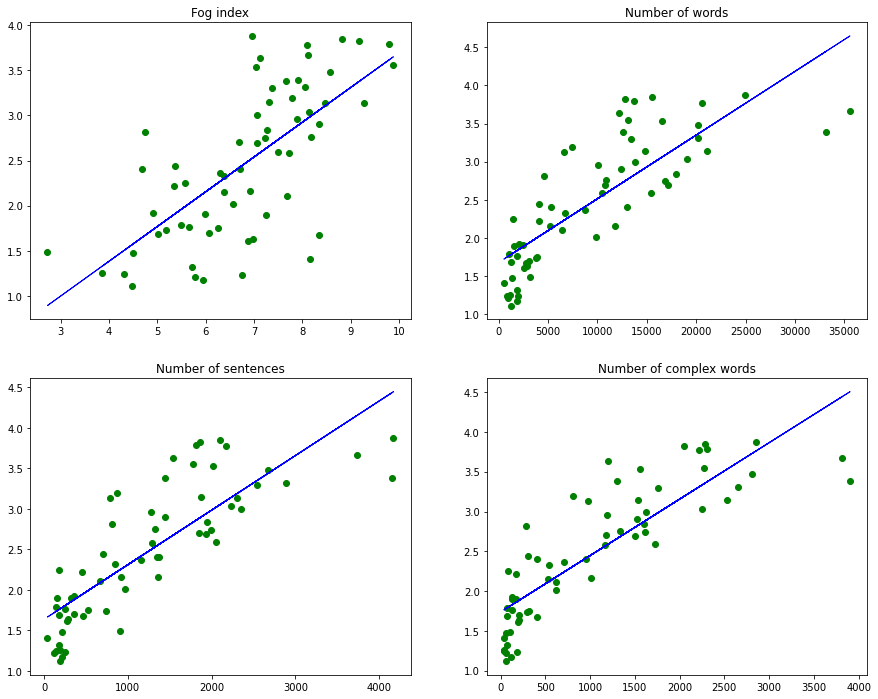

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))
axs[0, 0].scatter(sub_fog_list, sub_weight_list, c='g')
axs[0, 0].plot(sub_fog_list, pred_by_sub_fog, color='b', linewidth=1)
axs[0, 0].set_title('Fog index')

axs[0, 1].scatter(sub_words_list, sub_weight_list, c='g')
axs[0, 1].plot(sub_words_list, pred_by_sub_words, color='b', linewidth=1)
axs[0, 1].set_title('Number of words')

axs[1, 0].scatter(sub_sentences_list, sub_weight_list, c='g')
axs[1, 0].plot(sub_sentences_list, pred_by_sub_sentences, color='b', linewidth=1)
axs[1, 0].set_title('Number of sentences')

axs[1, 1].scatter(sub_complex_list, sub_weight_list, c='g')
axs[1, 1].plot(sub_complex_list, pred_by_sub_complex, color='b', linewidth=1)
axs[1, 1].set_title('Number of complex words')
plt.show()

In [26]:
print("For the games that have weights below 4:")
print("By Fog index, coefficient of determination is {:.4f}".format(r6))
print("By the number of words, coefficient of determination is {:.4f}".format(r7))
print("By the number of sentences, coefficient of determination is {:.4f}".format(r8))
print("By the number of complex words, coefficient of determination is {:.4f}".format(r9))

For the games that have weights below 4:
By Fog index, coefficient of determination is 0.6894
By the number of words, coefficient of determination is 0.8049
By the number of sentences, coefficient of determination is 0.8210
By the number of complex words, coefficient of determination is 0.8487


Turns out that even Fog Index got a better result with the games that have the weight less than 4. Hence, we can expect the prediction will give better results for the games that are in this part of complexity, while it might get frustrated with the games with weight bigger than 4.

## Predicting

In [27]:
games_pred = random.sample(games, 10)

In [28]:
test_games_parts = []
test_games_pred = []
test_game_names = []
test_weight_list = []

for i in range(len(games_pred)):
    soup = BeautifulSoup(games_pred[i], 'xml')
    test_games_parts.append(soup.find('rulebook').text)
    test_games_pred.append(soup.find('rulebook').text)
    test_game_names.append(soup.find('name')['value'])
    test_weight_list.append(float(soup.find('averageweight')['value']))

In [29]:
for i in range(len(test_game_names)):
    print(test_game_names[i])
    print(test_weight_list[i])

Spyfall
1.2368
Sagrada
1.9234
Glory III
2.7568
Kutuzov
3.3878
Century: Golem Edition
1.6842
Sword & Sorcery
4.0679
Roads & Boats
4.1872
Winds of Plunder
2.3652
World War II: Barbarossa to Berlin
3.5333
Ivanhoe
1.6103


In [30]:
for i in range(len(test_games_pred)):
    test_games_pred[i] = test_games_pred[i].replace('\n', '  ')
    test_games_pred[i] = test_games_pred[i].replace('\t', '')
    test_games_pred[i] = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", test_games_pred[i])
    test_games_pred[i] = re.sub("1|2|3|4|5|6|7|8|9|0", "", test_games_pred[i])

In [31]:
test_num_of_words_list = []
test_complex_words_list = []
test_sentences_list = []

for i in range(len(test_games_pred)):    
    lex = LexicalRichness(test_games_pred[i])
    words = lex.words
    temp_sentences = re.split('\! |\... |\? |\. |  ', test_games_pred[i]) # separating the sentences to count
    sentences = 0
    for s in temp_sentences:
        if len(s) > 3:
            sentences += 1
    complex_words = 0
    words_list = nltk_tokenize(test_games_pred[i])

    # a word is complex if it has at least three syllables
    for word in words_list:
        if len(hyphenate.hyphenate_word(word)) >= 3:
            complex_words += 1
            
    test_num_of_words_list.append(words)
    test_complex_words_list.append(complex_words)
    test_sentences_list.append(sentences)

In [32]:
prediction_words = []
prediction_complex = []
prediction_sentences = []

for i in range(len(test_games_pred)):
    prediction_words.append(words2weight(test_num_of_words_list[i]))
    prediction_complex.append(complex2weight(test_complex_words_list[i]))
    prediction_sentences.append(sentences2weight(test_sentences_list[i]))

In [33]:
final_pred = []
for i in range(len(prediction_words)):
    final_pred_formula = (prediction_words[i]*r3 + prediction_sentences[i]*r4 + prediction_complex[i]*r5) / (r3+r4+r5)
    if(final_pred_formula >= 5):
        final_pred_formula = 5
    final_pred.append(final_pred_formula)

In [34]:
for i in range(len(final_pred)):
    print("Final prediction: {:.4f} | Actual weight: {:.4f}".format(final_pred[i], test_weight_list[i]))

Final prediction: 2.1821 | Actual weight: 1.2368
Final prediction: 2.2035 | Actual weight: 1.9234
Final prediction: 2.8945 | Actual weight: 2.7568
Final prediction: 4.7115 | Actual weight: 3.3878
Final prediction: 2.1308 | Actual weight: 1.6842
Final prediction: 4.3004 | Actual weight: 4.0679
Final prediction: 2.6042 | Actual weight: 4.1872
Final prediction: 2.6769 | Actual weight: 2.3652
Final prediction: 3.2347 | Actual weight: 3.5333
Final prediction: 2.2119 | Actual weight: 1.6103


Turns out that the easiest games are predicted more than they actually are, which still cannot be considered as bad results since the calculated results are not far from the reality. Yet, it is understandable from their scatter plots and regression lines as well. Besides, other games are predicted better than the easiest games, except two of the hardest games. They could be the ones that act differently from the data itself. These fluctuations could be fixed with much more data since they could not be the only outliers.